In [1]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns


# Download Dataset or run in a kaggle notebook
# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
df = pl.read_csv("2019-Nov.csv")

In the previous video I covered `select`, `filter`, a few basic operations.

# How to update columns and intro to window functions

In [2]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-..."
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-..."
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-..."
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-..."
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-..."


In [3]:
df.shape

(67501979, 9)

### 1. Update values on one or multiple columns

In [4]:
df_top = df.head()
df_top

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-..."
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-..."
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-..."
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-..."
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-..."


In [5]:
# Update a string column
df_top.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2")
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2
str,str,i64,i64,str,str,f64,i64,str,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-...","""brand-xiaomi"""
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-...","""brand-janome"""
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-...","""brand-creed"""
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-...","""brand-lg"""
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-...","""brand-xiaomi"""


In [10]:
# Update a numeric column
df_top.with_columns([
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-...","""brand-xiaomi""",48907.0
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-...","""brand-janome""",29365.0
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-...","""brand-creed""",2831.0
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-...","""brand-lg""",71287.0
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-...","""brand-xiaomi""",18327.0


In [9]:
# Create a column with a constant (based on the mean) 
df_top.select([
    pl.all(),
    pl.col("price").mean().alias("price_avg")    
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-...",341.434
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-...",341.434
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-...",341.434
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-...",341.434
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-...",341.434


### 2. Update values based on window function

- In pandas this is done with `transform`. In R's dplyr with `mutate`. 
- The idea is we update values of a column BY a group and the new column has the same size of the original dataframe.
- The over() call defines the group we are interested in

In [11]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-..."
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-..."
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-..."
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-..."
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-..."


In [15]:
df.with_columns([
    pl.col("price").mean().over("category_code").alias("price_by_categorycode")
]).head(10)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_categorycode
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:...","""view""",1003461,2053013555631882655,"""electronics.sm...","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-...",483.637803
"""2019-11-01 00:...","""view""",5000088,2053013566100866035,"""appliances.sew...","""janome""",293.65,530496790,"""8e5f4f83-366c-...",244.516497
"""2019-11-01 00:...","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-...",176.64639
"""2019-11-01 00:...","""view""",3601530,2053013563810775923,"""appliances.kit...","""lg""",712.87,518085591,"""3bfb58cd-7892-...",340.601164
"""2019-11-01 00:...","""view""",1004775,2053013555631882655,"""electronics.sm...","""xiaomi""",183.27,558856683,"""313628f1-68b8-...",483.637803
"""2019-11-01 00:...","""view""",1306894,2053013558920217191,"""computers.note...","""hp""",360.09,520772685,"""816a59f3-f5ae-...",724.272491
"""2019-11-01 00:...","""view""",1306421,2053013558920217191,"""computers.note...","""hp""",514.56,514028527,"""df8184cc-3694-...",724.272491
"""2019-11-01 00:...","""view""",15900065,2053013558190408249,null,"""rondell""",30.86,518574284,"""5e6ef132-4d7c-...",176.64639
"""2019-11-01 00:...","""view""",12708937,2053013553559896355,null,"""michelin""",72.72,532364121,"""0a899268-31eb-...",176.64639


In [16]:
# now I can compute the difference between the price and the category average.
df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    pl.col("price").mean().over("category_code").alias("price_by_category"),
    (pl.col("price") / pl.col("price").mean().over("category_code") - 1).alias("price_div_cat_average")
])
df_cat_window.head()

category_code,price,price_by_category,price_div_cat_average
str,f64,f64,f64
"""electronics.sm...",489.07,483.637803,0.011232
"""appliances.sew...",293.65,244.516497,0.200941
null,28.31,176.64639,-0.839736
"""appliances.kit...",712.87,340.601164,1.092976
"""electronics.sm...",183.27,483.637803,-0.621059


In [17]:
df_cat_window_sample = df_cat_window.sample(1000000).to_pandas()

<AxesSubplot: >

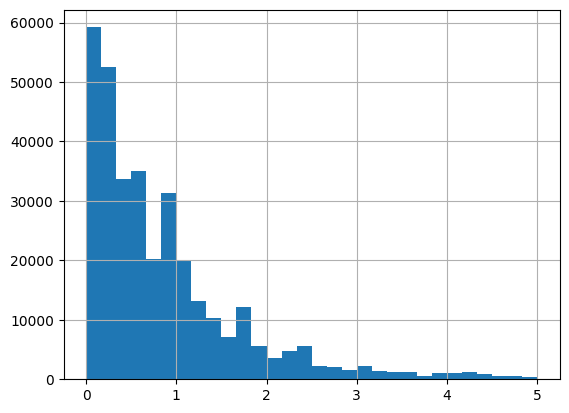

In [18]:
df_cat_window_sample.price_div_cat_average.hist(bins=30, range=[0, 5])

In [20]:
df_cat_window_sample.dtypes

category_code             object
price                    float64
price_by_category        float64
price_div_cat_average    float64
dtype: object

In [19]:
df_cat_window_sample.head()

,category_code,price,price_by_category,price_div_cat_average
0,electronics.smartphone,291.84,483.637803,-0.396573
1,furniture.living_room.cabinet,437.33,261.172347,0.674488
2,electronics.smartphone,128.65,483.637803,-0.733995
3,None,33.33,176.646390,-0.811318
4,None,115.81,176.646390,-0.344396


In [21]:
df_cat_window_sample.price_div_cat_average.quantile(np.arange(0, 1.1, 0.1))

0.0    -1.000000
0.1    -0.799964
0.2    -0.705295
0.3    -0.596723
0.4    -0.479408
0.5    -0.335519
0.6    -0.125449
0.7     0.105435
0.8     0.479715
0.9     1.055960
1.0    30.149060
Name: price_div_cat_average, dtype: float64

In [24]:
df_cat_window_sample[df_cat_window_sample.price_div_cat_average > 10].sort_values("price_div_cat_average", ascending=False)

,category_code,price,price_by_category,price_div_cat_average
325574,appliances.environment.air_heater,1876.56,60.244515,30.149060
574639,computers.peripherals.mouse,893.54,34.095449,25.207016
221090,accessories.bag,1717.16,66.893017,24.670243
364557,accessories.bag,1717.16,66.893017,24.670243
17460,accessories.bag,1603.64,66.893017,22.973205
...,...,...,...,...
195865,None,1948.86,176.646390,10.032549
821909,None,1948.73,176.646390,10.031813
549041,computers.peripherals.printer,2470.85,224.317950,10.014946
141680,computers.peripherals.printer,2470.85,224.317950,10.014946
